Various code assembled from online sources.

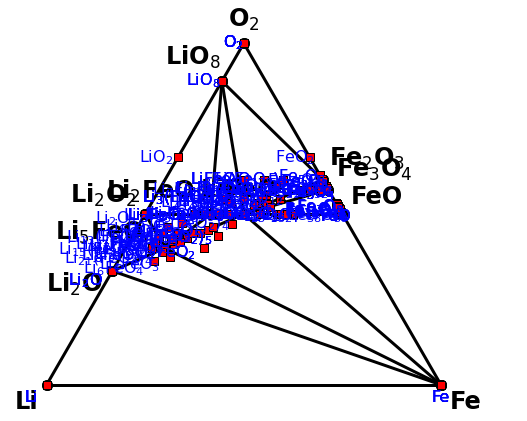

In [34]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
%matplotlib inline

#This initializes the REST adaptor. You may need to put your own API key in as an arg.
with MPRester("imSF4QxB19Wch2Zt") as m:

#Entries are the basic unit for thermodynamic and other analyses in pymatgen.
#This gets all entries belonging to the Ca-C-O system.
        entries = m.get_entries_in_chemsys(['Li', 'Fe', 'O'])

#With entries, you can do many sophisticated analyses, like creating phase diagrams.
pd = PhaseDiagram(entries)

#Let's show all phases, including unstable ones
plotter = PDPlotter(pd, show_unstable=0.2, backend="matplotlib")
plotter.show()

In [30]:
import collections

data = collections.defaultdict(list)
for e in entries:
    decomp, ehull = pd.get_decomp_and_e_above_hull(e)
    data["Materials ID"].append(e.entry_id)
    data["Composition"].append(e.composition.reduced_formula)
    data["Ehull"].append(ehull)    
    data["Decomposition"].append(" + ".join(["%.2f %s" % (v, k.composition.formula) for k, v in decomp.items()]))

from pandas import DataFrame
df = DataFrame(data, columns=["Materials ID", "Composition", "Ehull", "Decomposition"])

print(df.head(30))

   Materials ID Composition     Ehull Decomposition
0     mp-611448           C  0.142597       1.00 C4
1    mp-1097832           C  2.605766       1.00 C4
2    mp-1205283           C  0.697407       1.00 C4
3         mp-24           C  0.833079       1.00 C4
4    mp-1078845           C  0.265893       1.00 C4
5    mp-1244913           C  0.993796       1.00 C4
6    mp-1008374           C  0.436517       1.00 C4
7     mp-579909           C  0.943112       1.00 C4
8    mp-1181996           C  2.634925       1.00 C4
9    mp-1194362           C  1.502474       1.00 C4
10   mp-1188817           C  0.763339       1.00 C4
11   mp-1182684           C  1.527767       1.00 C4
12   mp-1197903           C  1.408604       1.00 C4
13    mp-568286           C  0.006294       1.00 C4
14    mp-683919           C  0.348517       1.00 C4
15   mp-1008395           C  0.333186       1.00 C4
16    mp-569416           C  0.028760       1.00 C4
17    mp-568806           C  0.010042       1.00 C4
18    mp-606

In [38]:
from pymatgen.ext.matproj import MPRester
with MPRester("imSF4QxB19Wch2Zt") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-19770")

    # Dos for material id
    dos = m.get_dos_by_material_id("mp-19770")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-19770")
    
    # To get a list of data for all entries having formula Fe2O3
    data = m.get_data("Fe2O3")

    # To get the energies of all entries having formula Fe2O3
    energies = m.get_data("Fe2O3", "formation energy")

MPRestError: REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative design tools." />\n  <link rel="search"\n      type="application/opensearchdescription+xml"\n      title="Search Materials Project"\n      href=\'/static/opensearch.25669ffdaab0.xml\'>\n  <link rel="shortcut icon" href=\'/static/images/favicon.00f51d402f3d.png\' />\n  <link rel="stylesheet" href=\'/static/stylesheets/less/compiled/nucleus.5db1710fde48.css\' charset="utf-8">\n  <link rel="stylesheet" href=\'/static/stylesheets/less/compiled/app.b2b36524052e.css\' charset="utf-8">\n  <link href="https://fonts.googleapis.com/css?family=Roboto+Slab:300,400,700" rel="stylesheet">\n<script type="text/javascript">\nif (!window.console) window.console = {};\nif (!window.console.log) window.console.log = function () {};\n</script>\n\n\n\n  <script src="/static/components/requirejs/require.a0fb07562cea.js" data-main="/static/js/dist/config.e26fe9c3da3d.js"></script>\n  <script type="text/javascript">\n  window.onload = function () {\n    require(["base"], function () {\n          window.PATH = "/static/js/redesign/views/";\n          window.STATIC_URL = "/static/";\n          window.GROUPS = JSON.parse("[]");\n          window.SANDBOX = "core";\n          $("span.chemform").each(function () {\n            $(this).html(_.htmlFormula($(this).text()))\n          })\n        \n    });\n  };\n  </script>\n\n\n\n<script type="text/javascript">\n\n      var _gaq = _gaq || [];\n      _gaq.push([\'_setAccount\', \'UA-26097776-1\']);\n      _gaq.push([\'_trackPageview\']);\n\n      (function() {\n        var ga = document.createElement(\'script\'); ga.type = \'text/javascript\'; ga.async = true;\n        ga.src = (\'https:\' == document.location.protocol ? \'https://ssl\' : \'http://www\') + \'.google-analytics.com/ga.js\';\n        var s = document.getElementsByTagName(\'script\')[0]; s.parentNode.insertBefore(ga, s);\n      })();\n\n</script>\n\n</head>\n<body>\n  \n  <header>\n  \n\n\n\n  \n    <nav class="navbar navbar-warning">\n      <center class="alert alert-info">\n        <button type="button" class="close" data-dismiss="alert">\n          &times;</button>\n        Try a preview of the new Materials Project website <a href=https://next-gen.materialsproject.org>here</a> before our official announcement later in the year.\n      </center>\n    </nav>\n  \n\n<nav class="navbar navbar-inverse">\n  <div class="navbar-inner">  \n     <a class="btn btn-navbar" data-toggle="collapse" data-target=".nav-collapse">\n      <span class="icon-bar"></span>\n      <span class="icon-bar"></span>\n      <span class="icon-bar"></span>\n    </a>\n    <div class="nav-collapse">\n      <a class="brand" href="/"><img src="/static/images/Logo/Mp-logo-v5.ad467cf84f15.png"></a>\n      <ul class="nav pull-right" role="navigation"> \n        <li>\n          <a href="/">Home</a>\n        </li>\n        <li class=dropdown>\n          <a data-toggle=dropdown role="button" class="dropdown-toggle" href="#">About <b class="caret"></b></a>  \n          <ul class="dropdown-menu">\n            <li role="presentation">\n              <a href="/about">About</a>\n            </li>\n            <li role="presentation">\n              <a class="" href="https://discuss.matsci.org/c/materials-project" target="_blank">\n  Forum\n</a>\n\n           </li>\n            <li role="presentation">\n              <a href="/press">Press</a>\n            </li>\n            <li role="presentation">\n              <a href="/references">Publications</a>\n            </li>\n            <li role="presentation">\n              <a href="/citing">Citing</a>\n            </li>\n            <li role="presentation">\n              <a href="/infrastructure">Infrastructure</a>\n            </li>\n          </ul>\n        </li>\n\n      \n        \n          \n<li class="dropdown">\n  <a data-toggle=dropdown role="button" class="dropdown-toggle" href="#">Apps <b class="caret"></b></a>\n\n  <ul class="dropdown-menu">\n    <li role="presentation">\n      <a href="/#search/materials/">Materials Explorer</a>\n    </li>\n    <li role="presentation">\n      <a href="/#search/batteries/">Battery Explorer</a>\n    </li>\n    <li role="presentation">\n      <a href="/#apps/xtaltoolkit">Crystal Toolkit</a>\n    </li>\n    <li role="presentation">\n      <a href="/#apps/structurepredictor">Structure Predictor</a>\n    </li>\n    <li role="presentation">\n      <a href="/#apps/phasediagram/">Phase Diagram</a>\n    </li>\n    <li role="presentation">\n      <a href="/#apps/pourbaixdiagram">Pourbaix Diagram</a>\n    </li>\n    <li role="presentation">\n      <a href="/#apps/reactioncalculator">Reaction Calculator</a>\n    </li>\n    <li role="presentation">\n      <a href="/#search/thermo">Thermodynamical Data</a>\n    </li>\n    <li role="presentation">\n      <a href="/#compare">Compare Elements</a>\n    </li>\n    <li role="presentation">\n      <a href="/#search/porous/">Nanoporous Explorer</a>\n    </li>\n    <li role="presentation">\n      <a href="/#search/molecules/">Molecules Explorer</a>\n    </li>\n    <li role="presentation">\n      <a href="/#apps/rfbdashboard/">RFB Dashboard</a>\n    </li>\n    <li role="presentation">\n      <a href="/#apps/xas/">XAS Matcher</a>\n    </li>\n    <li role="presentation">\n      <a href="/#apps/interfacereactions/">Interface Reactions</a>\n    </li>\n    <li role="presentation">\n      <a href="/apps/synthesis/">Synthesis Descriptions</a>\n    </li>\n  </ul>\n</li>\n\n        \n      \n\n        \n<li class="dropdown">\n  <a data-toggle=dropdown role="button" class="dropdown-toggle" href="#">Documentation <b class="caret"></b></a>\n  <ul class="dropdown-menu">\n    <li role="presentation">\n      <a href="/docs/api">API</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/calculations">Calculations Guide</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/phasediagram">Phase Diagram</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/pourbaixdiagram">Pourbaix Diagram</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/battery">Battery Search</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/rxncalculator">Reaction Calculator</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/xtaltoolkit">Crystal Toolkit</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/structurepredictor">Structure Predictor</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/nanoporous">Nanoporous Explorer</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/molecules">Molecules Explorer</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/rfbdashboard">RFB Dashboard</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/xas">XAS Matcher</a>\n    </li>\n    <li role="presentation">\n      <a href="/docs/interfacerxns">Interface Reactions</a>\n    </li>\n    <!--\n    <li role="presentation">\n      <a href="/docs/error_checking">Error Checking</a>\n    </li>\n    <li role="separator" class="divider"\n        style="border-bottom: 1px solid #6F6F6F;"></li>\n    <li role="presentation">\n      <a href="//wiki.materialsproject.org">Wiki</a>\n    </li>\n    -->\n  </ul>\n</li>\n\n        <li>\n        <li>\n          <a href="https://discuss.matsci.org/c/materials-project">Forum</a>\n        </li>\n        <li>\n          <a href="/open">API</a>\n        </li>\n        \n        <li>\n          <a href="https://www.youtube.com/playlist?list=PLTjFYVNE7LTjHJwV994iQHS-bIkh3UXKJ"\n             class="nav-tutorials-link yt-icon-youtube-play">\n            Tutorials\n          </a>\n        </li>\n        <li>\n          <a href="/dashboard" data-icon="&gt;" class="icon"> Dashboard</a>\n        </li>\n        <li>\n          <a href="/janrain/logout" ><i title="logout" class="icon-logout"></i></a>\n        </li>\n      \n      </ul>\n    </div>\n  </div>\n</nav>\n\n  </header>\n  \n  \n<div class="container">\n  <h1> Page Not Found </h1>\n  <div>\n    <p>\n      The page you attempted to view is not available.  Please check\n      the URL and try again.  If you got here by following a link from\n      the Materials Project site, please let us know by sending a\n      message to feedback [at] materialsproject.org.\n    </p>\n    <p>\n      If you got to this page via a login link, it\'s possible your\n      link is no longer valid. Login links only work once, and they\n      are only valid for 24.0 hours after being\n      generated.\n    </p>\n    <center><a class="icon icon-home" href="/"> Return Home</a></center>\n  </div>\n</div>\n\n  <footer>\n  \n  \n  <hr>\n<ul class="text-center inline">\n\t<li>\n  \t<a href="/about">About</a>\n\t</li>\n\t<li>\n\t  <a class="" href="https://discuss.matsci.org/c/materials-project" target="_blank">\n  Forum\n</a>\n\n\t</li>\n\t<li>\n\t  <a href="/citing">Citing</a>\n\t</li>\n\t<li>\n  \t  <a href="/terms">Terms of Use</a>\n\t</li>\n\t<li>\n  \t<a href="/open">API</a>\n\t</li>\n</ul>\n<div class="pad-top row text-center">\n\t  <small>\n          Powered by <a href="http://pymatgen.org">pymatgen</a>,\n      <a href="https://materialsproject.github.io/custodian">custodian</a>,\n      <a href="https://materialsproject.github.io/fireworks">fireworks</a>,\n      and <a href="https://hackingmaterials.github.io/atomate">atomate</a>.<br>\n          <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://mirrors.creativecommons.org/presskit/buttons/80x15/svg/by.svg" /></a> Our data is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.\n\t</small>\n</div>\n\n\n  </footer>\n  <script id="crystal-toolkit-uri" type="application/json">"https://viewer.materialsproject.org"</script>\n  <!-- Manged at https://cdn.fontawesome.com by dwinston-->\n  <script src="https://use.fontawesome.com/fd3b9caec8.js"></script>\n</body>\n</html>\n'

In [ ]:
from pymatgen.ext.matproj import MPRester
from pymatgen.apps.borg.hive import VaspToComputedEntryDrone
from pymatgen.apps.borg.queen import BorgQueen
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

# Assimilate VASP calculations into ComputedEntry object. Let's assume that
# the calculations are for a series of new LixFeyOz phases that we want to
# know the phase stability.
drone = VaspToComputedEntryDrone()
queen = BorgQueen(drone, rootpath=".")
entries = queen.get_data()

# Obtain all existing Li-Fe-O phases using the Materials Project REST API
with MPRester("imSF4QxB19Wch2Zt") as m:
    mp_entries = m.get_entries_in_chemsys(["Li", "Fe", "O"])

# Combined entry from calculated run with Materials Project entries
entries.extend(mp_entries)

# Process entries using the MaterialsProjectCompatibility
compat = MaterialsProjectCompatibility()
entries = compat.process_entries(entries)

# Generate and plot Li-Fe-O phase diagram
pd = PhaseDiagram(entries)
plotter = PDPlotter(pd)
plotter.show()